# Abnormal Activity Detection

Surveillance systems, mainly composed of cameras, are today widespread in both indoor and outdoor environments.

- Video surveillance involves the act of observing a scene or scenes and looking for specific behaviors that are improper or that may indicate the emergence or existence of improper behavior.

- Common uses of video surveillance include observing the public at the entry to sports events, public transportation (train platforms, airports, etc.), and around the perimeter of secure facilities, especially those that are directly bounded by community spaces.

In this project, convolutional neural networks using image recognition and their combination with recurrent neural networks temporal information is extracted using which an intelligent surveillance system is made.The LSTM Encoder-Decoder framework is used to learn representation of video sequences and applied for detect abnormal event in complex environment.The abnormal events are identified by computing the reconstruction loss using Euclidean distance between original and reconstructed batch.

The training videos capture normal situations. Testing videos include both normal and abnormal events. Some of the abnormal activities are as follows:

- Fighting	
- Stealing	
- Doing some abnormal activites

## Import Libraries

In [1]:
import numpy as np
import os 
import cv2
from keras.preprocessing.image import img_to_array,load_img
from keras.layers import Conv3D,ConvLSTM2D,Conv3DTranspose
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\HP\Anaconda3\envs\new_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HP\Anaconda3\envs\new_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HP\Anaconda3\envs\new_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HP\Anaconda3\envs\new_env\lib\site-packag

## Changing current path

In [2]:
cd C:\\Users\\HP\\Desktop\\Testing cam\\testing accuracy file\\

C:\Users\HP\Desktop\Testing cam\testing accuracy file


In [3]:
pwd

'C:\\Users\\HP\\Desktop\\Testing cam\\testing accuracy file'

## Creating training data path and folder

In [45]:
store_image=[]
train_path='C:\\Users\\HP\\Desktop\\Testing cam\\cam12\\individual files'
train_videos=os.listdir(train_path)
train_images_path=train_path+'\\frames'

In [46]:
try:
      
    # creating a folder named data
    if not os.path.exists('frames'):
        os.makedirs('frames')
  
# if not created then raise error
except OSError:
    print ('Error: Creating directory of data')

## Helper functions for model

- store_inarry function convert the images into array and store them as gray scale images array in store_image list. 
- into_frames function capture the video and read it frame by frame, it skips every 10 frames and capture a image from it because creating images for frame is computationally very high. 
- mean_squared_loss function is used for calculating the loss.

In [47]:
def store_inarray(image_path):
    image=load_img(image_path)
    image=img_to_array(image)
    image=cv2.resize(image, (227,227), interpolation = cv2.INTER_AREA)
    gray=0.2989*image[:,:,0]+0.5870*image[:,:,1]+0.1140*image[:,:,2]  ##To convert an RGB image to grayscale, you can use the RGB2GRAY command from the Image Processing Toolbox. If you do not have this toolbox, then you can use the standard NTSC conversion formula that is used for calculating the effective luminance of a pixel:intensity = 0.2989*red + 0.5870*green + 0.1140*blue
    store_image.append(gray)

In [48]:
def into_frames(train_path,video):
    cam=cv2.VideoCapture(train_path+'\\'+video)
    i = 0
    j = 0
    # a variable to set how many frames you want to skip
    frame_skip = 10
    while cam.isOpened():
        ret, frame = cam.read()     # read returns a tuple (bool value, image)
        if not ret:
            break
        if i > frame_skip - 1:
            # if video is still left continue creating images
            name = './frames/' + video + '_image_' + str(j) + '.jpg'
            print ('Creating...' + name)
            cv2.imwrite(name, frame)
            i = 0
            continue
        i += 1
        j += 1

    cam.release()

In [50]:
def mean_squared_loss(x1,x2):
    difference=x1-x2
    a,b,c,d,e=difference.shape
    n_samples=a*b*c*d*e
    sq_difference=difference**2
    Sum=sq_difference.sum()
    distance=np.sqrt(Sum)
    mean_distance=distance/n_samples

    return mean_distance

## Creating videos into images frame by frame

In [113]:
for video in train_videos:
    into_frames(train_path,video)

Creating..../frames/01.avi_image_10.jpg
Creating..../frames/01.avi_image_20.jpg
Creating..../frames/01.avi_image_30.jpg
Creating..../frames/01.avi_image_40.jpg
Creating..../frames/01.avi_image_50.jpg
Creating..../frames/01.avi_image_60.jpg
Creating..../frames/01.avi_image_70.jpg
Creating..../frames/01.avi_image_80.jpg
Creating..../frames/01.avi_image_90.jpg
Creating..../frames/01.avi_image_100.jpg
Creating..../frames/01.avi_image_110.jpg
Creating..../frames/01.avi_image_120.jpg
Creating..../frames/01.avi_image_130.jpg
Creating..../frames/01.avi_image_140.jpg
Creating..../frames/01.avi_image_150.jpg
Creating..../frames/01.avi_image_160.jpg
Creating..../frames/01.avi_image_170.jpg
Creating..../frames/01.avi_image_180.jpg
Creating..../frames/01.avi_image_190.jpg
Creating..../frames/01.avi_image_200.jpg
Creating..../frames/01.avi_image_210.jpg
Creating..../frames/01.avi_image_220.jpg
Creating..../frames/01.avi_image_230.jpg
Creating..../frames/01.avi_image_240.jpg
Creating..../frames/01.av

Creating..../frames/02.avi_image_810.jpg
Creating..../frames/02.avi_image_820.jpg
Creating..../frames/02.avi_image_830.jpg
Creating..../frames/02.avi_image_840.jpg
Creating..../frames/02.avi_image_850.jpg
Creating..../frames/02.avi_image_860.jpg
Creating..../frames/02.avi_image_870.jpg
Creating..../frames/02.avi_image_880.jpg
Creating..../frames/02.avi_image_890.jpg
Creating..../frames/02.avi_image_900.jpg
Creating..../frames/02.avi_image_910.jpg
Creating..../frames/02.avi_image_920.jpg
Creating..../frames/02.avi_image_930.jpg
Creating..../frames/02.avi_image_940.jpg
Creating..../frames/02.avi_image_950.jpg
Creating..../frames/02.avi_image_960.jpg
Creating..../frames/02.avi_image_970.jpg
Creating..../frames/02.avi_image_980.jpg
Creating..../frames/02.avi_image_990.jpg
Creating..../frames/02.avi_image_1000.jpg
Creating..../frames/02.avi_image_1010.jpg
Creating..../frames/02.avi_image_1020.jpg
Creating..../frames/02.avi_image_1030.jpg
Creating..../frames/02.avi_image_1040.jpg
Creating...

Creating..../frames/04.avi_image_80.jpg
Creating..../frames/04.avi_image_90.jpg
Creating..../frames/04.avi_image_100.jpg
Creating..../frames/04.avi_image_110.jpg
Creating..../frames/04.avi_image_120.jpg
Creating..../frames/04.avi_image_130.jpg
Creating..../frames/04.avi_image_140.jpg
Creating..../frames/04.avi_image_150.jpg
Creating..../frames/04.avi_image_160.jpg
Creating..../frames/04.avi_image_170.jpg
Creating..../frames/04.avi_image_180.jpg
Creating..../frames/04.avi_image_190.jpg
Creating..../frames/04.avi_image_200.jpg
Creating..../frames/04.avi_image_210.jpg
Creating..../frames/04.avi_image_220.jpg
Creating..../frames/04.avi_image_230.jpg
Creating..../frames/04.avi_image_240.jpg
Creating..../frames/04.avi_image_250.jpg
Creating..../frames/04.avi_image_260.jpg
Creating..../frames/04.avi_image_270.jpg
Creating..../frames/04.avi_image_280.jpg
Creating..../frames/04.avi_image_290.jpg
Creating..../frames/04.avi_image_300.jpg
Creating..../frames/04.avi_image_310.jpg
Creating..../frame

Creating..../frames/05.avi_image_730.jpg
Creating..../frames/05.avi_image_740.jpg
Creating..../frames/06.avi_image_10.jpg
Creating..../frames/06.avi_image_20.jpg
Creating..../frames/06.avi_image_30.jpg
Creating..../frames/06.avi_image_40.jpg
Creating..../frames/06.avi_image_50.jpg
Creating..../frames/06.avi_image_60.jpg
Creating..../frames/06.avi_image_70.jpg
Creating..../frames/06.avi_image_80.jpg
Creating..../frames/06.avi_image_90.jpg
Creating..../frames/06.avi_image_100.jpg
Creating..../frames/06.avi_image_110.jpg
Creating..../frames/06.avi_image_120.jpg
Creating..../frames/06.avi_image_130.jpg
Creating..../frames/06.avi_image_140.jpg
Creating..../frames/06.avi_image_150.jpg
Creating..../frames/06.avi_image_160.jpg
Creating..../frames/06.avi_image_170.jpg
Creating..../frames/06.avi_image_180.jpg
Creating..../frames/06.avi_image_190.jpg
Creating..../frames/06.avi_image_200.jpg
Creating..../frames/06.avi_image_210.jpg
Creating..../frames/06.avi_image_220.jpg
Creating..../frames/06.av

Creating..../frames/07.avi_image_640.jpg
Creating..../frames/07.avi_image_650.jpg
Creating..../frames/07.avi_image_660.jpg
Creating..../frames/07.avi_image_670.jpg
Creating..../frames/07.avi_image_680.jpg
Creating..../frames/07.avi_image_690.jpg
Creating..../frames/07.avi_image_700.jpg
Creating..../frames/07.avi_image_710.jpg
Creating..../frames/07.avi_image_720.jpg
Creating..../frames/07.avi_image_730.jpg
Creating..../frames/07.avi_image_740.jpg
Creating..../frames/07.avi_image_750.jpg
Creating..../frames/07.avi_image_760.jpg
Creating..../frames/07.avi_image_770.jpg
Creating..../frames/07.avi_image_780.jpg
Creating..../frames/07.avi_image_790.jpg
Creating..../frames/07.avi_image_800.jpg
Creating..../frames/07.avi_image_810.jpg
Creating..../frames/07.avi_image_820.jpg
Creating..../frames/07.avi_image_830.jpg
Creating..../frames/07.avi_image_840.jpg
Creating..../frames/07.avi_image_850.jpg
Creating..../frames/07.avi_image_860.jpg
Creating..../frames/07.avi_image_870.jpg
Creating..../fra

Creating..../frames/09.avi_image_790.jpg
Creating..../frames/09.avi_image_800.jpg
Creating..../frames/09.avi_image_810.jpg
Creating..../frames/09.avi_image_820.jpg
Creating..../frames/09.avi_image_830.jpg
Creating..../frames/09.avi_image_840.jpg
Creating..../frames/09.avi_image_850.jpg
Creating..../frames/09.avi_image_860.jpg
Creating..../frames/09.avi_image_870.jpg
Creating..../frames/09.avi_image_880.jpg
Creating..../frames/09.avi_image_890.jpg
Creating..../frames/09.avi_image_900.jpg
Creating..../frames/09.avi_image_910.jpg
Creating..../frames/09.avi_image_920.jpg
Creating..../frames/09.avi_image_930.jpg
Creating..../frames/09.avi_image_940.jpg
Creating..../frames/09.avi_image_950.jpg
Creating..../frames/09.avi_image_960.jpg
Creating..../frames/09.avi_image_970.jpg
Creating..../frames/09.avi_image_980.jpg
Creating..../frames/09.avi_image_990.jpg
Creating..../frames/09.avi_image_1000.jpg
Creating..../frames/09.avi_image_1010.jpg
Creating..../frames/09.avi_image_1020.jpg
Creating..../

Creating..../frames/11.avi_image_440.jpg
Creating..../frames/11.avi_image_450.jpg
Creating..../frames/11.avi_image_460.jpg
Creating..../frames/11.avi_image_470.jpg
Creating..../frames/11.avi_image_480.jpg
Creating..../frames/11.avi_image_490.jpg
Creating..../frames/11.avi_image_500.jpg
Creating..../frames/11.avi_image_510.jpg
Creating..../frames/11.avi_image_520.jpg
Creating..../frames/11.avi_image_530.jpg
Creating..../frames/11.avi_image_540.jpg
Creating..../frames/11.avi_image_550.jpg
Creating..../frames/11.avi_image_560.jpg
Creating..../frames/11.avi_image_570.jpg
Creating..../frames/11.avi_image_580.jpg
Creating..../frames/11.avi_image_590.jpg
Creating..../frames/11.avi_image_600.jpg
Creating..../frames/11.avi_image_610.jpg
Creating..../frames/11.avi_image_620.jpg
Creating..../frames/11.avi_image_630.jpg
Creating..../frames/11.avi_image_640.jpg
Creating..../frames/11.avi_image_650.jpg
Creating..../frames/11.avi_image_660.jpg
Creating..../frames/11.avi_image_670.jpg
Creating..../fra

In [9]:
images=os.listdir(train_images_path)
for image in images:
    image_path=train_images_path + '\\' + image
    store_inarray(image_path)

In [10]:
len(images)

14990

## Store the standardized data in a numpy file

We have to standardized our data because it makes sure that data is internally consistent; that is, each data type has the same content and format. Standardized values are useful for tracking data that isn't easy to compare otherwise.Then we have finally stored our data in a numpy file.

In [11]:
store_image=np.array(store_image,dtype='uint8')                  # list containing images array is converted into array
a,b,c=store_image.shape

store_image.resize(b,c,a)
store_image=(store_image-store_image.mean())/(store_image.std()) # (x-mean)/standard_deviation (Data Standardization)
store_image=np.clip(store_image,0,1)
#print(store_image)
np.save('training.npy',store_image)

In [12]:
store_image.shape

(227, 227, 14990)

In [38]:
store_image

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.65755486,
         0.65755486, 0.65755486],
        [0.69324436, 0.67539961, 0.65755486, ..., 0.62186536,
         0.63971011, 0.63971011],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.81815762,
         0.81815762, 0.85384712],
        [0.81815762, 0.78246811, 0.78246811, ..., 0.85384712,
         0.74677861, 0.72893386],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

## Defining model

In [9]:
model=Sequential()

model.add(Conv3D(filters=128,kernel_size=(11,11,1),strides=(4,4,1),padding='valid',input_shape=(227,227,10,1),activation='relu'))
model.add(Conv3D(filters=64,kernel_size=(5,5,1),strides=(2,2,1),padding='valid',activation='relu'))
model.add(ConvLSTM2D(filters=64,kernel_size=(3,3),strides=1,padding='same',dropout=0.4,recurrent_dropout=0.3,return_sequences=True))
model.add(ConvLSTM2D(filters=32,kernel_size=(3,3),strides=1,padding='same',dropout=0.3,return_sequences=True))
model.add(ConvLSTM2D(filters=64,kernel_size=(3,3),strides=1,return_sequences=True, padding='same',dropout=0.5))
model.add(Conv3DTranspose(filters=128,kernel_size=(5,5,1),strides=(2,2,1),padding='valid',activation='relu'))
model.add(Conv3DTranspose(filters=1,kernel_size=(11,11,1),strides=(4,4,1),padding='valid',activation='relu'))

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

## Training and saving model

In [14]:
training_data=np.load('training.npy')
frames=training_data.shape[2]
frames=frames-frames%10

training_data=training_data[:,:,:frames]
training_data=training_data.reshape(-1,227,227,10)
training_data=np.expand_dims(training_data,axis=4)
target_data=training_data.copy()

epochs=10
batch_size=10

callback_save = ModelCheckpoint("saved_model.h5", monitor="mean_squared_error", save_best_only=True)

callback_early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history=model.fit(training_data,target_data, batch_size=batch_size, epochs=epochs, callbacks = [callback_save,callback_early_stopping])
model.save("saved_model.h5")

Epoch 1/10
150/150 [==============================] - 1017s 7s/step - loss: 0.1655 - accuracy: 0.5585
Epoch 2/10
150/150 [==============================] - 1053s 7s/step - loss: 0.0736 - accuracy: 0.6704
Epoch 3/10
150/150 [==============================] - 1060s 7s/step - loss: 0.0544 - accuracy: 0.6901
Epoch 4/10
150/150 [==============================] - 1068s 7s/step - loss: 0.0461 - accuracy: 0.6982
Epoch 5/10
150/150 [==============================] - 1076s 7s/step - loss: 0.0412 - accuracy: 0.7029
Epoch 6/10
150/150 [==============================] - 1068s 7s/step - loss: 0.0382 - accuracy: 0.7056
Epoch 7/10
150/150 [==============================] - 1067s 7s/step - loss: 0.0360 - accuracy: 0.7075
Epoch 8/10
150/150 [==============================] - 1078s 7s/step - loss: 0.0342 - accuracy: 0.7092
Epoch 9/10
150/150 [==============================] - 1066s 7s/step - loss: 0.0326 - accuracy: 0.7105
Epoch 10/10
150/150 [==============================] - 1072s 7s/step - loss: 0.032

## Visualization of loss and accuracy on Training data 

In [15]:
train_loss=history.history['loss']
train_acc=history.history['accuracy']


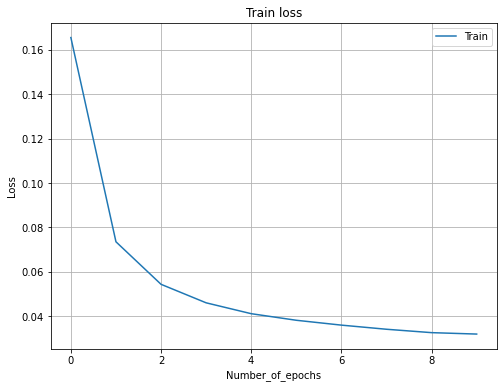

In [16]:
plt.figure(figsize=(8,6))
plt.plot(train_loss)
plt.xlabel('Number_of_epochs')
plt.ylabel('Loss')
plt.title('Train loss')
plt.legend(['Train'])
plt.grid('True')

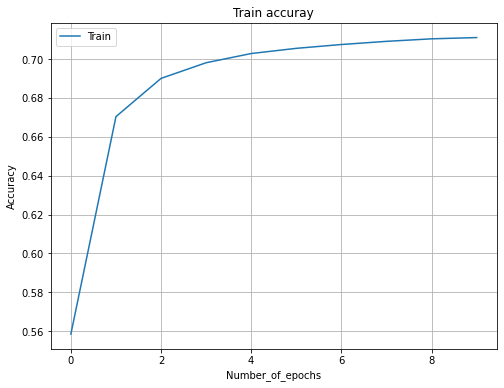

In [17]:
plt.figure(figsize=(8,6))
plt.plot(train_acc)
plt.xlabel('Number_of_epochs')
plt.ylabel('Accuracy')
plt.title('Train accuray')
plt.legend(['Train'])
plt.grid('True')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 55, 55, 10, 128)   15616     
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 26, 26, 10, 64)    204864    
_________________________________________________________________
conv_lst_m2d (ConvLSTM2D)    (None, 26, 26, 10, 64)    295168    
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, 26, 26, 10, 32)    110720    
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, 26, 26, 10, 64)    221440    
_________________________________________________________________
conv3d_transpose (Conv3DTran (None, 55, 55, 10, 128)   204928    
_________________________________________________________________
conv3d_transpose_1 (Conv3DTr (None, 227, 227, 10, 1)   1

## Load model

In [10]:
#model=load_model("saved_model_final.h5")
model.load_weights("saved_model_final.h5")

## Reading a test video file 

In [51]:
cap = cv2.VideoCapture("C:\\Users\\HP\\Desktop\\Testing cam\\testing accuracy file\\8a.mp4")
print(cap.isOpened())

True


## Testing for Abnormal activity in a test video file

In [53]:
flag=0
while cap.isOpened():
    image_array=[]
    ret,frame=cap.read()

    for i in range(10):
        ret,frame=cap.read()
        
        if not hasattr(frame,'shape'):
            flag=1
            break
        
        image = imutils.resize(frame,width=640,height=360)

        frame=cv2.resize(frame, (640,360), interpolation = cv2.INTER_AREA)
        gray=0.2989*frame[:,:,0]+0.5870*frame[:,:,1]+0.1140*frame[:,:,2]
        gray=(gray-gray.mean())/gray.std()
        gray=np.clip(gray,0,1)
        image_array.append(gray)
    
    if flag==1:
        break

    image_array=np.array(image_array)
    #print(imagedump)

    image_array.resize(227,227,10)
    image_array=np.expand_dims(image_array,axis=0)
    image_array=np.expand_dims(image_array,axis=4)
    
    #print(imagedump)

    output=model.predict(image_array)

    loss=mean_squared_loss(image_array,output)
    
    print(loss)

    if frame.any()==None:
        print("none")

    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
    if (loss>0.000662 and loss<0.000685) or (loss>0.00070 and loss<0.000708):                
        print('Abnormal Event Detected')
        cv2.putText(image,"Abnormal Event",(100,100),cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,255),4,cv2.LINE_AA)

    cv2.imshow("video",image)

cap.release()
cv2.destroyAllWindows()

0.0007110339466719027
0.0007094741924390377
0.0007089000352340356
0.0007061600860313324
Abnormal Event Detected
0.0007091837303038131


## Test Accuracy

We will be finding accuracy of above model using Confusion matrix.

In [19]:
def check(string, sub_str):
    if (string.find(sub_str) == -1):
        return False
    else:
        return True

In [86]:
tp=0
tn=0
fp=0
fn=0

flag_a=0

for filename in os.listdir("C:\\Users\\HP\\Desktop\\Testing cam\\testing accuracy file\\test frames"):
    image_array=[]
    if filename.endswith(".jpg"):
        if(check(filename,"a")):
            flag_a=1
            #print(filename)
        else:
            flag_a=0
            
    frame=cv2.imread("C:\\Users\\HP\\Desktop\\Testing cam\\testing accuracy file\\test frames"+"\\"+filename)
    
    gray=0.2989*frame[:,:,0]+0.5870*frame[:,:,1]+0.1140*frame[:,:,2]
    gray=(gray-gray.mean())/gray.std()
    gray=np.clip(gray,0,1)
    image_array.append(gray)
    
    image_array=np.array(image_array)

    image_array.resize(227,227,10)
    image_array=np.expand_dims(image_array,axis=0)   
    image_array=np.expand_dims(image_array,axis=4)  

    output=model.predict(image_array)
    loss=mean_squared_loss(image_array,output)
    
    #print(filename,loss)

    if loss>0.000496:    
        if flag_a:
            tp=tp+1
        else:
            fp=fp+1
    else:                
        if flag_a:
            fn=fn+1
        else:
            tn=tn+1

In [87]:
print(tp,tn,fp,fn)

85 75 61 23


In [88]:
total=tp+tn+fp+fn

###### Accuracy
Overall, how often is the classifier correct? 

In [89]:
accuracy=((tp+tn)/total)*100
accuracy

65.57377049180327

The downside of simple accuracy, is that accuracy works well in balanced datasets. However, in unbalanced datasets, accuracy becomes a poorer metric.

###### Misclassification 
 Overall, how often is it wrong?

In [90]:
error=((fp+fn)/total)*100
error

34.42622950819672

###### Recall – or true positive rate
When it's actually yes, how often does it predict yes?

In [91]:
recall=((tp)/(tp+fn))
recall

0.7870370370370371

###### False positive rate
When it's actually no, how often does it predict yes?

In [92]:
fpr=((fp)/(tn+fp))
fpr

0.4485294117647059

###### Precision
When it predicts yes, how often is it correct?

In [93]:
precision=(tp/(tp+fp))
precision

0.5821917808219178

### F-score
An f-score is a way to measure a model’s accuracy based on recall and precision. There’s a general case F-score, called the F1-score.The higher an F-score, the more accurate a model is. The lower an F-score, the less accurate a model is.

The F1-score is the most commonly used F-score. It is a combination of precision and recall, namely their harmonic mean. We can calculate F1-score via the following formula:

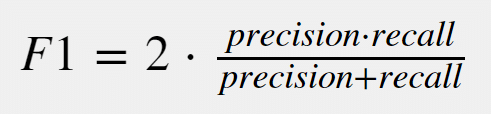

In [94]:
fscore=2*(precision*recall)/(precision+recall)
fscore

0.6692913385826772

In [122]:
import seaborn
import matplotlib.pyplot as plt
 
 
def plot_confusion_matrix(data, labels, output_filename):
    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title("Confusion Matrix")
 
    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="Predicted Label", xlabel="True Label")
 
    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.close()
 
# define data
data = [[tn,fn],
        [fp,tp]]
 
# define labels
labels = ["Normal", "Abnormal"]
 
# create confusion matrix
plot_confusion_matrix(data, labels, "confusion_matrix.png")

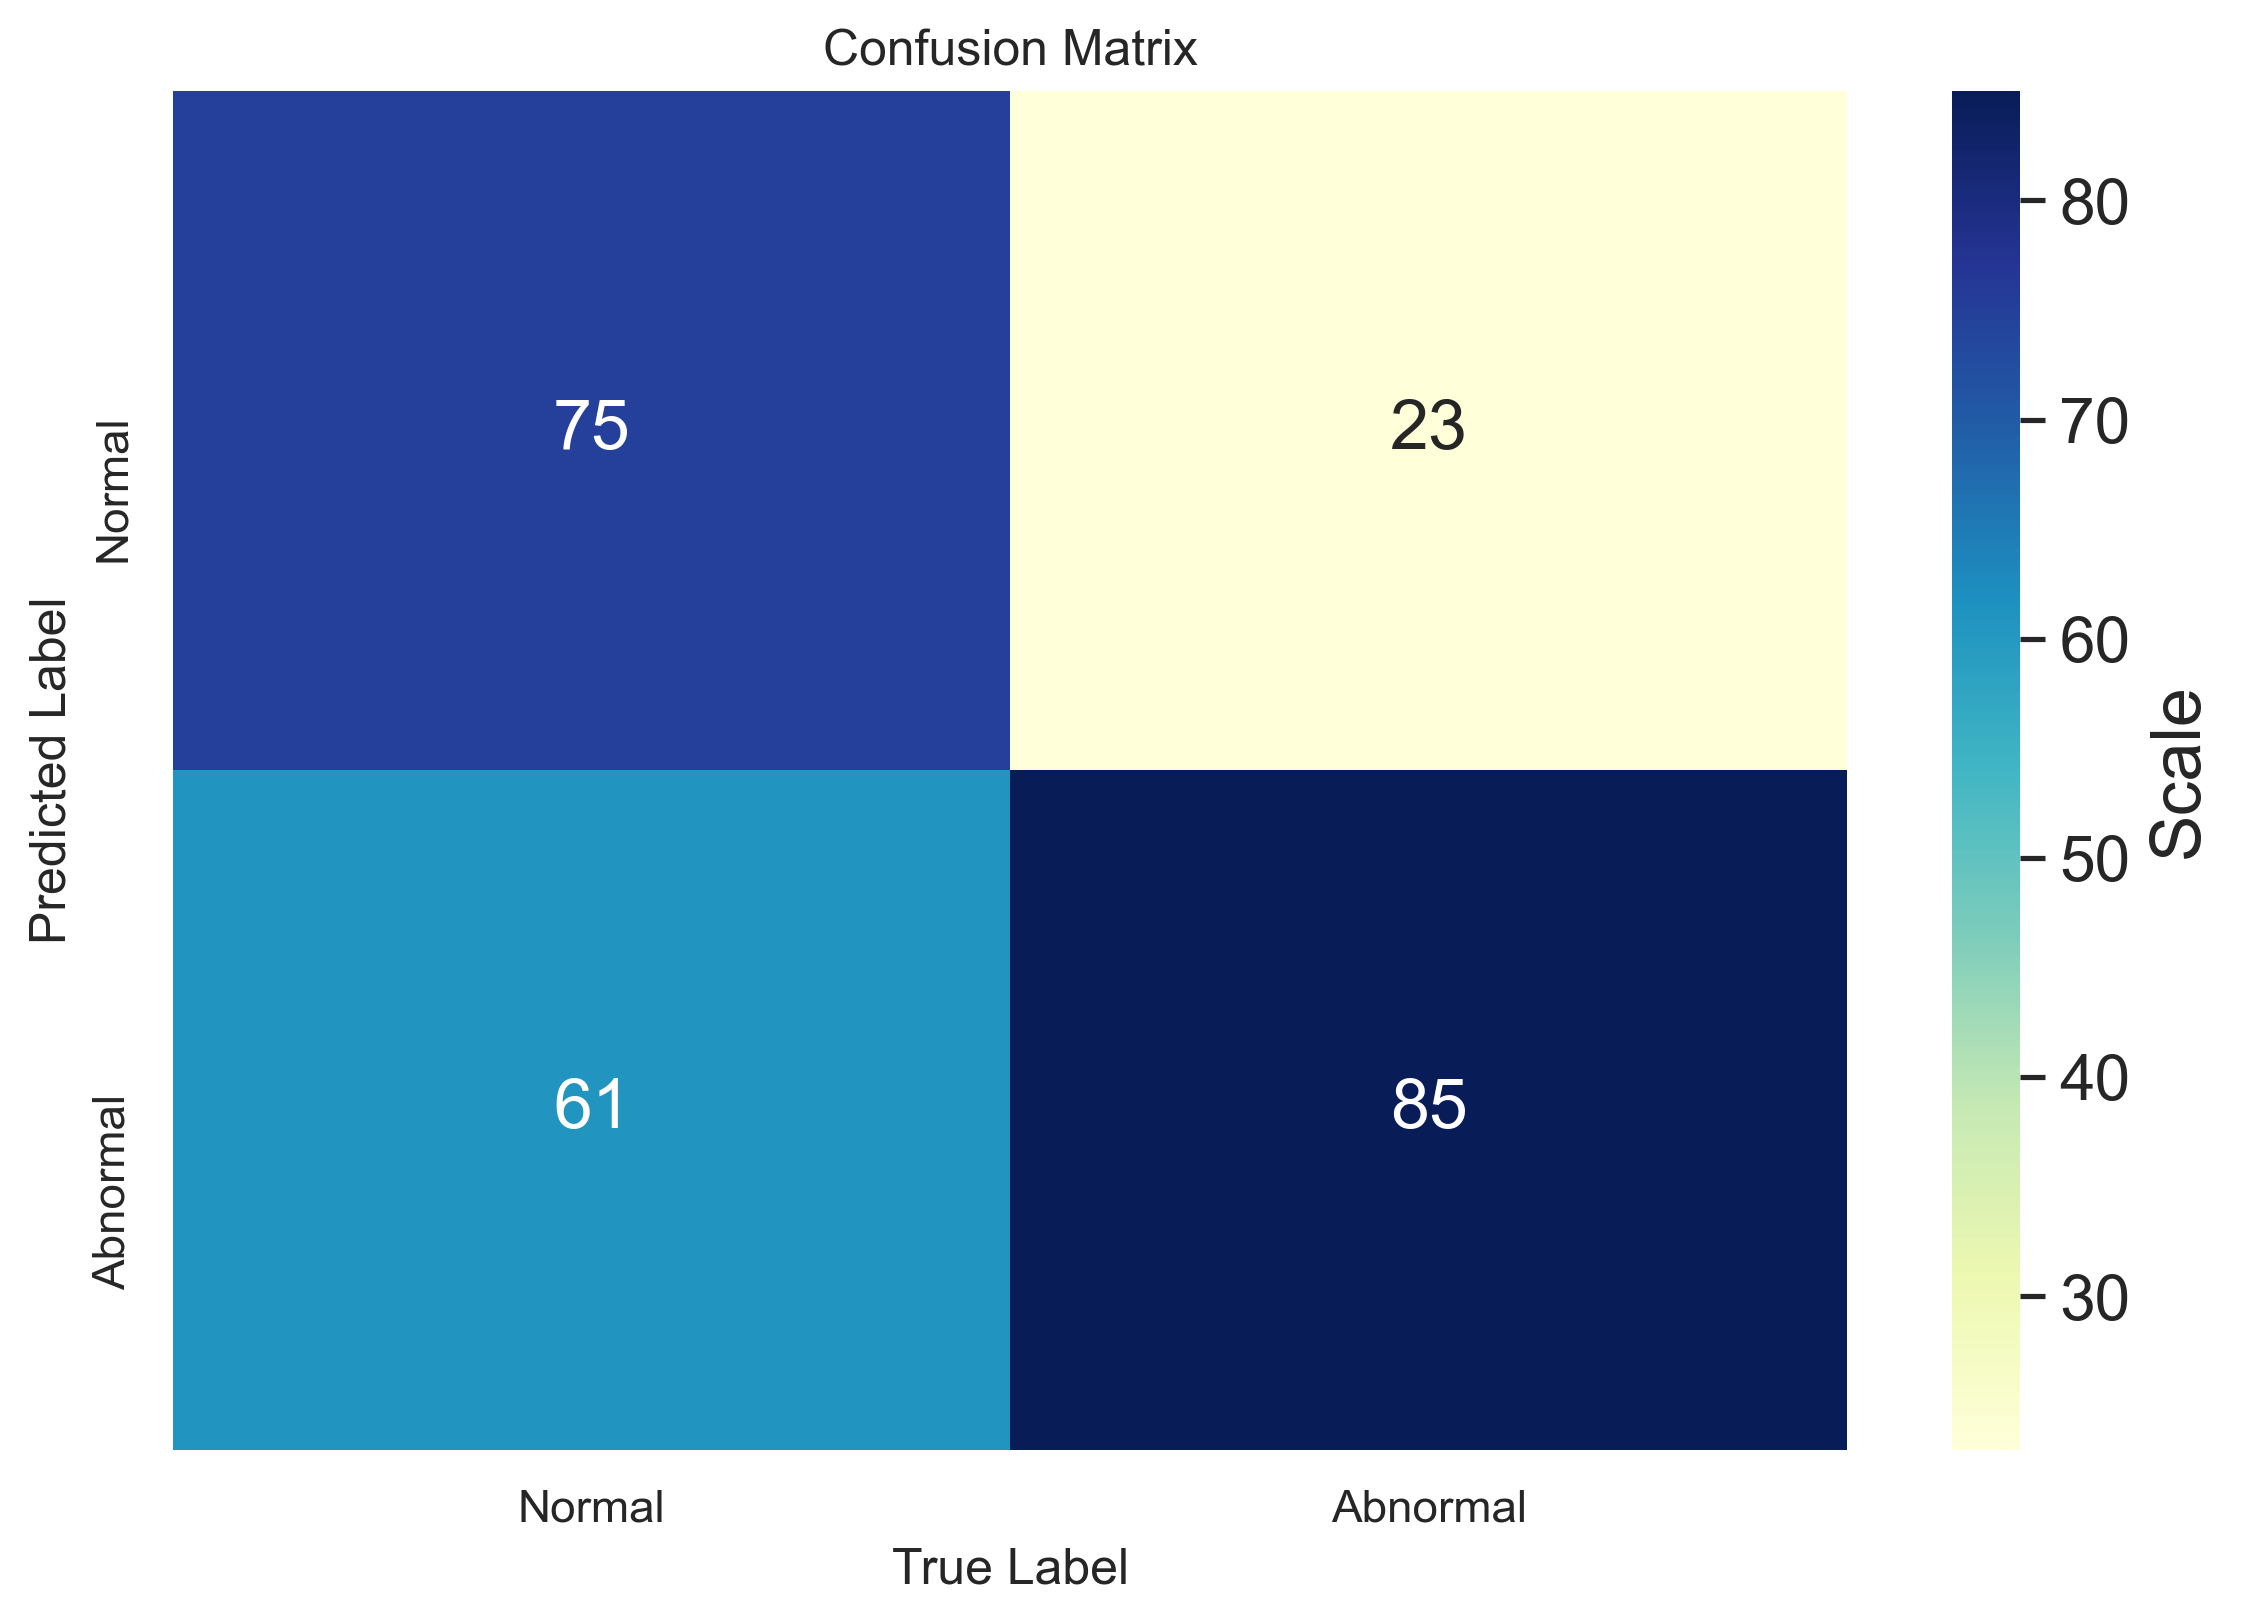

In [123]:
load_img("confusion_matrix.png")